###### 2020-10-23 금요일

# visualization_실습_(2)

### 목차

#### 1. 데이터 불러오기

#### 2. 데이터 정제

#### 3. 시각화

#### 4. 지도 시각화

In [1]:
# warning 제거 옵션

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [3]:
# 한글폰트 깨짐
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 깨짐
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


## 1. 파일 불러오기
   - glob() : 아래의 사용법을 보는 것이 이해가 빠를거 같아요

##### 파일 여러개 불러오는법
   - glob() : 아래의 사용법을 보는 것이 이해가 빠를거 같아요

In [5]:
from glob import glob

In [6]:
files = glob('./실습데이터/oil_data/지역*.xls')
files

['./실습데이터/oil_data\\지역_위치별(주유소) (1).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (10).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (11).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (12).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (13).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (14).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (15).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (16).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (17).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (18).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (19).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (2).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (20).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (21).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (22).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (23).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (24).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (3).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (4).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (5).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (6).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (7).xls',
 './실습데이터/oil_data\\지역_위치별(주유소) (8).xls',
 './실습데이터/oil_data\

 - 1. 불러온 엑셀 파일들을 데이터프레임 형식으로 리스트에 하나씩 담고 있다
 - 2. 리스트에 담겨진 데이터프레임들을 pd.concat함수를 이용해 하나의 데이터프레임으로 만들고 있다.

In [7]:
tmp_raw = []
for file in files :
    tmp = pd.read_excel(file, header=2)
    tmp_raw.append(tmp)

oil_station = pd.concat(tmp_raw)

oil_station.head(10)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1554,1354,997
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1556,1355,-
2,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1855,1559,1349,1000
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1578,1388,1100
4,서울특별시,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1588,1388,-
5,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,1588,1388,-
6,서울특별시,알이디씨(주)천동주유소,서울특별시 강동구 천호대로 987 (천호동),현대오일뱅크,02-473-1556,N,-,1598,1398,1000
7,서울특별시,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,-,1598,1398,1000
8,서울특별시,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),GS칼텍스,02-474-7222,N,1857,1599,1398,1000
9,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1608,1398,990


In [8]:
oil_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 45
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      537 non-null    object
 1   상호      537 non-null    object
 2   주소      537 non-null    object
 3   상표      537 non-null    object
 4   전화번호    537 non-null    object
 5   셀프여부    537 non-null    object
 6   고급휘발유   537 non-null    object
 7   휘발유     537 non-null    object
 8   경유      537 non-null    object
 9   실내등유    537 non-null    object
dtypes: object(10)
memory usage: 46.1+ KB


## 2. 데이터 정제

##### 원하는 칼럼만 추출

In [9]:
# 휘발유만 대상으로 분석을 진행한다면?
stations = pd.DataFrame({
    'oil_store' :  oil_station['상호'],
    'address'   :  oil_station['주소'],
    'price'     :  oil_station['휘발유'],
    'self'      :  oil_station['셀프여부'],
    'company'   :  oil_station['상표']
})

stations.head(10)

,oil_store,address,price,self,company
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스
5,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1588,Y,S-OIL
6,알이디씨(주)천동주유소,서울특별시 강동구 천호대로 987 (천호동),1598,N,현대오일뱅크
7,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1598,Y,SK에너지
8,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),1599,N,GS칼텍스
9,방아다리주유소,서울 강동구 동남로 811 (명일동),1608,Y,SK에너지


##### 주소로부터 '구'를 추출하여 파생변수로 만들자

In [10]:
# 파생변수를 생성해보자
# 구별 주유 가격을 조사하기 주소에서 구만 추출하여 파생변수로 만들자

stations['direct'] = [address.split()[1] for address in stations ['address']]
stations.head(10)

,oil_store,address,price,self,company,direct
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구
5,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1588,Y,S-OIL,강동구
6,알이디씨(주)천동주유소,서울특별시 강동구 천호대로 987 (천호동),1598,N,현대오일뱅크,강동구
7,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1598,Y,SK에너지,강동구
8,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),1599,N,GS칼텍스,강동구
9,방아다리주유소,서울 강동구 동남로 811 (명일동),1608,Y,SK에너지,강동구


In [11]:
# 구별 정보를 확인하고 싶다면?
stations['direct'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '서울특별시', '성북구',
       '송파구', '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강남구'],
      dtype=object)

##### '구'만을 추출하여야 하는데 서울특별시와 특별시가 썪여 나왔다
##### 새로만든 '구' 파생변수에서 다음과 같은 작업을 진행하자
   - 1. '서울특별시'는 '성동구'로 변환
   - 2. '특별시'는 '도봉구'로 변환

In [12]:
# 서울특별시 -> 성동구
# 특별시 -> 도봉구

stations.loc[stations['direct'] == '서울특별시', 'direct'] = '성동구'
stations.loc[stations['direct'] == '특별시', 'direct'] = '도봉구'

In [13]:
stations['direct'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

##### price(가격)이 '-'인 데이터를 제거하자

In [14]:
# 가격정보가 기입되지 않은 주유소는 제거
# 칼럼타입을 숫자형으로 변경

# 'price'칼럼의 경우, '-'으로 입력되있는 값이있음
# 그 값을 결측값으로 대체하자
stations.loc[stations['price'] == '-', 'price'] =np.NaN 

# 결측치를 제외하자
display(stations.isnull().sum())
stations02 = stations.dropna(inplace=False)

# 문자를 숫자타입으로 바꾼다
stations02['price'] = stations02['price'].astype(int)

display(stations02.info())


oil_store    0
address      0
price        4
self         0
company      0
direct       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 45
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   oil_store  533 non-null    object
 1   address    533 non-null    object
 2   price      533 non-null    int32 
 3   self       533 non-null    object
 4   company    533 non-null    object
 5   direct     533 non-null    object
dtypes: int32(1), object(5)
memory usage: 27.1+ KB


None

## 3. 시각화

##### 지금까지 배워온 시각화를 간단히 적용해 보자

In [15]:
stations02.reset_index(inplace=True)
display(stations02.head(10))

del stations02['index']
display(stations02.head(10))

,index,oil_store,address,price,self,company,direct
0,0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구
5,5,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1588,Y,S-OIL,강동구
6,6,알이디씨(주)천동주유소,서울특별시 강동구 천호대로 987 (천호동),1598,N,현대오일뱅크,강동구
7,7,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1598,Y,SK에너지,강동구
8,8,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),1599,N,GS칼텍스,강동구
9,9,방아다리주유소,서울 강동구 동남로 811 (명일동),1608,Y,SK에너지,강동구


,oil_store,address,price,self,company,direct
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구
5,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1588,Y,S-OIL,강동구
6,알이디씨(주)천동주유소,서울특별시 강동구 천호대로 987 (천호동),1598,N,현대오일뱅크,강동구
7,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1598,Y,SK에너지,강동구
8,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),1599,N,GS칼텍스,강동구
9,방아다리주유소,서울 강동구 동남로 811 (명일동),1608,Y,SK에너지,강동구


<AxesSubplot:title={'center':'price'}, xlabel='self'>

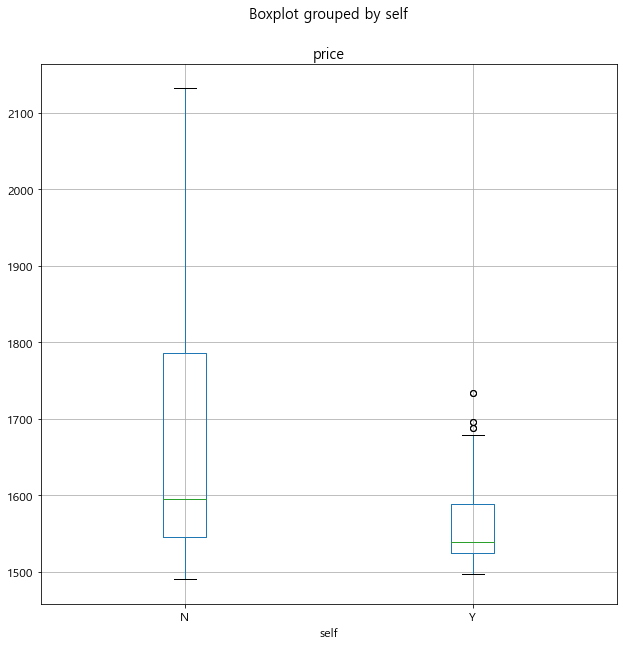

In [16]:
stations02.boxplot(column='price', by='self')

<AxesSubplot:xlabel='company', ylabel='price'>

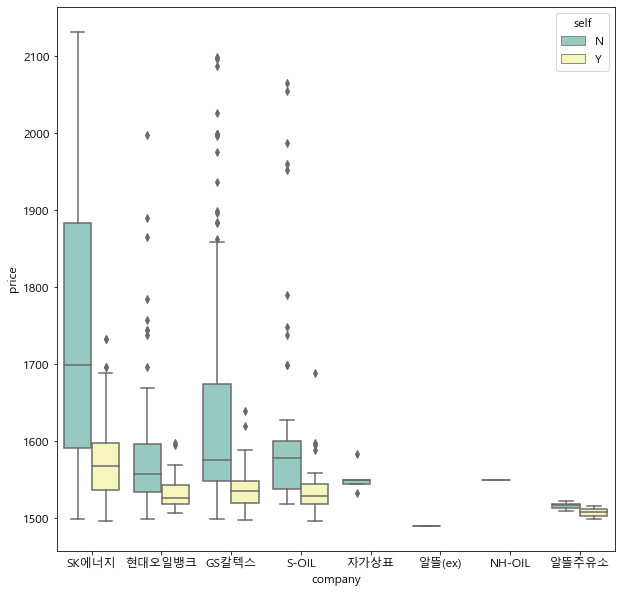

In [17]:
sns.boxplot(x = 'company', 
            y = 'price', 
            data = stations02,
           palette = 'Set3',
           hue = 'self')

## 4. 지도 시각화
   - 지도를 시각화 하기 위해서는 지도의 '위도'와 '경도'가 필요하다
   - 하지만 우리의 데이터는 '위도'와 '경도'가 존재하지 않는다.
   - 그런경우 우리가 가지고 있는 주소'데이터를 `googlemaps`와 구글 map 키를 통해 '위도'와 '경도'를 구할 수 있다.
   - **하지만 구글 키의 경우 절대 외부로 노출되어서는 안된다!**

In [18]:
import json
import folium
import googlemaps

In [19]:
stations02.head()

,oil_store,address,price,self,company,direct
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구


In [20]:
# 피봇을 이용하여 구별 가격 정보로 변경하고 가격 평균값으로 만들어보자
pivot_df = stations02.pivot_table(values='price', index='direct', aggfunc='mean')
pivot_df.columns = ['average_price']
pivot_df

,average_price
direct,
강남구,1791.000000
강동구,1656.722222
강북구,1534.333333
강서구,1576.428571
관악구,1603.055556
광진구,1569.333333
구로구,1597.227273
금천구,1616.642857
노원구,1606.000000


##### 지도에 서울 지역구 표시하기

In [21]:
geo_str = json.load( open('./실습데이터/02. skorea_municipalities_geo_simple.json', encoding='utf-8') )

In [79]:
map01 = folium.Map(location=[37.55, 126.98], zoom_start=10.5, tiles='Stamen Terrain')

folium.Choropleth(geo_data = geo_str,
                  data = pivot_df,
                  columns = [pivot_df.index, 'average_price'],
                  key_on = 'feature.id').add_to(map01)


map01

##### 주유가격 상위 10곳과 하위 10곳을 지도에 표시해보자
##### 그러기 위해 googlemap을 통해 위도와 경도 값을 가져와야 한다.

 - 주유가격 상위 Top10 DataFrame : oil_station_top10
 - 주유가격 하위 Top10 DataFrame : oil_station_bottom10

In [83]:
oil_station_top10 = stations02.sort_values(by='price', ascending=False).head(10)
display(oil_station_top10.head(10))

oil_station_bottom10 = stations02.sort_values(by='price', ascending=True).head(10)
display(oil_station_bottom10.head(10))

,oil_store,address,price,self,company,direct
325,서남주유소,서울 중구 통일로 30 (봉래동1가),2132,N,SK에너지,중구
324,장충주유소,서울 중구 장충단로 202 (장충동1가),2130,N,SK에너지,중구
124,양재주유소,서울 서초구 바우뫼로 178 (양재동),2128,N,SK에너지,서초구
532,뉴서울(강남),서울 강남구 언주로 716 (논현동),2120,N,SK에너지,강남구
531,오천주유소,서울 강남구 봉은사로 503 (삼성동),2107,N,SK에너지,강남구
313,재동주유소,서울특별시 종로구 율곡로 58 (경운동),2106,N,SK에너지,종로구
285,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),2106,N,SK에너지,용산구
284,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),2106,N,SK에너지,용산구
283,강변주유소,서울특별시 용산구 원효로 9 (청암동),2106,N,SK에너지,용산구
323,통일주유소,서울 중구 동호로 296 (장충동2가),2106,N,SK에너지,중구


,oil_store,address,price,self,company,direct
83,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1490,N,알뜰(ex),서초구
344,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1497,Y,SK에너지,강서구
451,태릉솔밭주유소,서울특별시 노원구 노원로 49 (공릉동),1497,Y,S-OIL,노원구
258,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1498,Y,GS칼텍스,강북구
227,(주)강서오일,서울 영등포구 도신로 151 (도림동),1499,N,현대오일뱅크,영등포구
225,도림주유소,서울 영등포구 도림로 343 (도림동),1499,Y,알뜰주유소,영등포구
226,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1499,N,GS칼텍스,영등포구
415,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1499,N,SK에너지,구로구
326,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1499,Y,SK에너지,중랑구
40,서경주유소,서울 동작구 대림로 46 (신대방동),1499,N,현대오일뱅크,동작구


##### 구글 맵을 이용해 위도 경도를 가져온다

**구글키는 절대 절대 외부로 공개해서는 안된다**

깃헙 올릴때 주의!

In [84]:
gmap_key = ""
gmaps = googlemaps.Client(key = gmap_key)

주유소 가격 상위 10곳의 위도 경도 가져오기

In [86]:
latitude = []
longtitude = []
for idx in oil_station_top10.index:
    tmp_address = str(oil_station_top10.loc[idx, 'address'])
    tmp_map = gmaps.geocode(tmp_address)
    
    tmp_loc = tmp_map[0].get('geometry')
    
    latitude.append(tmp_loc['location']['lat'])
    longtitude.append(tmp_loc['location']['lng'])

In [88]:


oil_station_top10['latitude'] = latitude
oil_station_top10['longtitude'] = longtitude

display(oil_station_top10.head(10))

,oil_store,address,price,self,company,direct,latitude,longtitude
325,서남주유소,서울 중구 통일로 30 (봉래동1가),2132,N,SK에너지,중구,37.559112,126.972491
324,장충주유소,서울 중구 장충단로 202 (장충동1가),2130,N,SK에너지,중구,37.562102,127.007810
124,양재주유소,서울 서초구 바우뫼로 178 (양재동),2128,N,SK에너지,서초구,37.478071,127.039610
532,뉴서울(강남),서울 강남구 언주로 716 (논현동),2120,N,SK에너지,강남구,37.517653,127.035715
531,오천주유소,서울 강남구 봉은사로 503 (삼성동),2107,N,SK에너지,강남구,37.513458,127.053786
313,재동주유소,서울특별시 종로구 율곡로 58 (경운동),2106,N,SK에너지,종로구,37.574357,126.987141
285,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),2106,N,SK에너지,용산구,37.548983,126.967087
284,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),2106,N,SK에너지,용산구,37.547330,126.972257
283,강변주유소,서울특별시 용산구 원효로 9 (청암동),2106,N,SK에너지,용산구,37.534605,126.948779
323,통일주유소,서울 중구 동호로 296 (장충동2가),2106,N,SK에너지,중구,37.560714,127.003177


##### 주유가격 상위 Top10 지도에 표시하기

In [89]:
for latitude, longtitude, name in zip(oil_station_top10.latitude, oil_station_top10.longtitude, oil_station_top10.oil_store):
    marker = folium.Marker( [latitude, longtitude],
                         popup = name,
                         icon = folium.Icon(color='red'))
    marker.add_to(map01)
map01

이제 하위 10개 주유소도 지도에 표시해보자

In [91]:
latitude = []
longtitude = []
for idx in oil_station_bottom10.index:
    tmp_address = str(oil_station_bottom10.loc[idx, 'address'])
    tmp_map = gmaps.geocode(tmp_address)
    
    tmp_loc = tmp_map[0].get('geometry')
    
    latitude.append(tmp_loc['location']['lat'])
    longtitude.append(tmp_loc['location']['lng'])

In [92]:


oil_station_bottom10['latitude'] = latitude
oil_station_bottom10['longtitude'] = longtitude

display(oil_station_bottom10.head(10))

,oil_store,address,price,self,company,direct,latitude,longtitude
83,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1490,N,알뜰(ex),서초구,37.459906,127.042060
344,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1497,Y,SK에너지,강서구,37.555284,126.768567
451,태릉솔밭주유소,서울특별시 노원구 노원로 49 (공릉동),1497,Y,S-OIL,노원구,37.625918,127.085533
258,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1498,Y,GS칼텍스,강북구,37.642140,127.029568
227,(주)강서오일,서울 영등포구 도신로 151 (도림동),1499,N,현대오일뱅크,영등포구,37.506964,126.901468
225,도림주유소,서울 영등포구 도림로 343 (도림동),1499,Y,알뜰주유소,영등포구,37.509790,126.898340
226,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1499,N,GS칼텍스,영등포구,37.498556,126.895791
415,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1499,N,SK에너지,구로구,37.489965,126.825487
326,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1499,Y,SK에너지,중랑구,37.590907,127.093834
40,서경주유소,서울 동작구 대림로 46 (신대방동),1499,N,현대오일뱅크,동작구,37.487947,126.908240


##### 주유가격 하위 Top10 지도에 표시하기

In [94]:
for latitude, longtitude, name in zip(oil_station_bottom10.latitude, oil_station_bottom10.longtitude, oil_station_bottom10.oil_store):
    marker = folium.Marker( [latitude, longtitude],
                         popup = name,
                         icon = folium.Icon(color='blue'))
    marker.add_to(map01)
map01